In [10]:
from empiricaldist import Pmf
import numpy as np
from utils import decorate

Exercise: In Major League Baseball, most players have a batting average between .200 and .330, which means that their probability of getting a hit is between 0.2 and 0.33.

Suppose a player appearing in their first game gets 3 hits out of 3 attempts. What is the posterior distribution for their probability of getting a hit?

For this exercise, I’ll construct the prior distribution by starting with a uniform distribution and updating it with imaginary data until it has a shape that reflects my background knowledge of batting averages.

In [6]:
# hypos = np.linspace(0, 1, 101) -> my initial attempt
hypos = np.linspace(0.1, 0.4, 101) # solution
prior = Pmf(1, hypos)

In [7]:
likelihood = {
    'Y': hypos, #gets a hit
    'N': 1-hypos, #does not get a hit
}

In [8]:
dataset = 'Y' * 25 + 'N' * 75 #dataset with reasonable prior distribution

In [9]:
for data in dataset:
    prior *= likelihood[data]
prior.normalize()

np.float64(1.3596964206970507e-23)

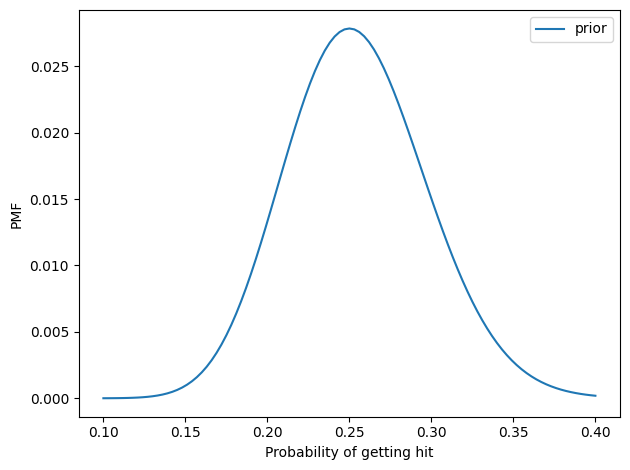

In [11]:
prior.plot(label='prior')
decorate(xlabel='Probability of getting hit',
         ylabel='PMF')

In [13]:
#up until now, we were just generating a 'reasonable prior'
# therefore, we have the prior now we just need to update with the data of YYY
# this is coming from the likelihood
posterior = prior.copy()
for data in 'YYY':
    posterior *= likelihood[data]
posterior.normalize()

np.float64(0.017944179687707326)

In [15]:
posterior.max_prob()

np.float64(0.271)

In [16]:
prior.max_prob()

np.float64(0.25)

Ask each person to flip a coin and, without revealing the outcome,

    If they get heads, they report YES.

    If they get tails, they honestly answer the question “Do you cheat on your taxes?”

If someone says YES, we don’t know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

In [ ]:
hypos = np.linspace(0, 1, 101) # what Im assuming of people that will cheat.
prior = Pmf(1, hypos)

In [ ]:
# If the actual fraction of cheaters is `x`, the number of
# YESes is (0.5 + x/2), and the number of NOs is (1-x)/2
likelihood = {
    'Y': 0.5 + hypos / 2, #50% will answer yes, then assuming half of tails group also say yes
    'N': (1-hypos) / 2,
}

In [29]:
dataset = 'Y' * 80 + 'N' * 20

In [30]:
posterior = prior.copy()
for data in dataset:
    posterior *= likelihood[data]
posterior.normalize()

np.float64(3.6945139133967024e-21)

In [31]:
posterior.max_prob()

np.float64(0.6)

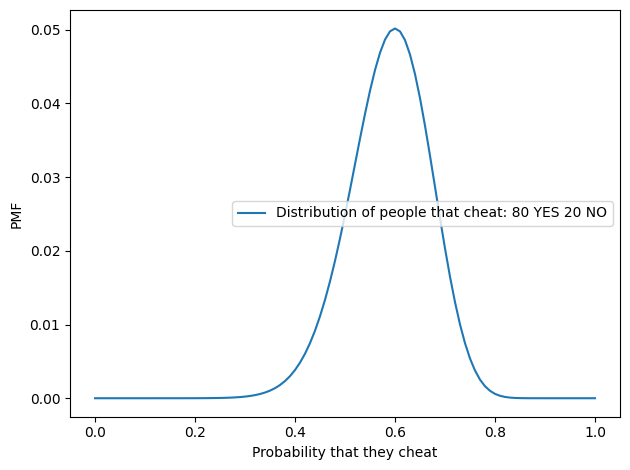

In [34]:
posterior.plot(label='Distribution of people that cheat: 80 YES 20 NO')
decorate(xlabel='Probability that they cheat',
         ylabel='PMF')

In [33]:
posterior.idxmax()

np.float64(0.6)

Exercise: Suppose you want to test whether a coin is fair, but you don’t want to spin it hundreds of times. So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate. Specifically, suppose the probability is y=0.2 that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of x? What happens as you vary the value of y?

In [35]:
hypos = np.linspace(0, 1, 101) #probability the coin is fair for heads (0 means no heads)
pmf = Pmf(1, hypos) # assuming uniform prior

In [36]:
y = 0.2
likelihood = {
    'H': hypos * y, # considering machine bias -> if guarantee heads then machine would be 80% accurate -> 1 * 0.
    'T': (1-hypos) * y,
}

In [37]:
dataset = 'H' * 140 + 'T' * 110

In [38]:
posterior = prior.copy()
for data in dataset:
    posterior *= likelihood[data]
posterior.normalize()

np.float64(4.767233591607673e-249)

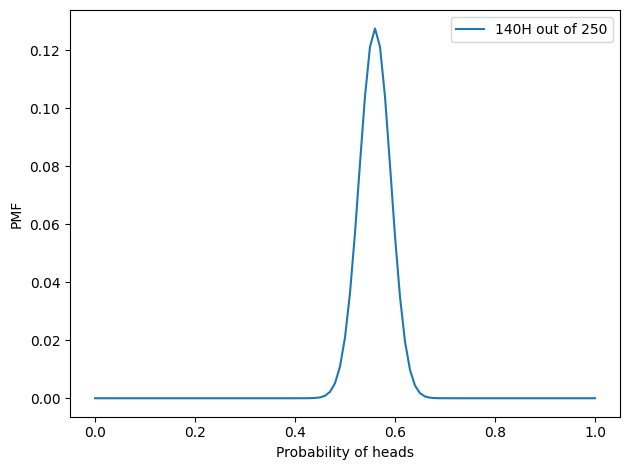

In [39]:
posterior.plot(label='140H out of 250')
decorate(xlabel='Probability of heads',
         ylabel='PMF')

In [41]:
posterior.idxmax()

np.float64(0.56)

In [42]:
# The above is incorrect
# a hypo of 0 means tails reported! -> 1-hypos means probability of a tails. 
likelihood = {
    'H': (1-y) * hypos + y * (1-hypos), # y is if heads is reported incorrectly -> (1-y) is successful reporting
    'T': y * hypos + (1-y) * (1-hypos),
}

In [43]:
# Then I can iterate through several y values to see the difference in distributions

In [44]:
posterior = prior.copy()
for data in dataset:
    posterior *= likelihood[data]
posterior.normalize()

np.float64(4.391534169454059e-74)

<Axes: >

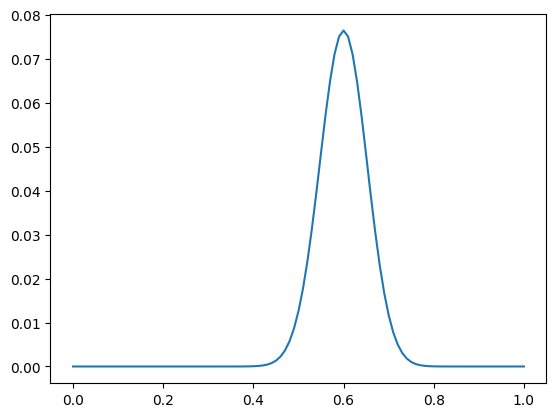

In [45]:
posterior.plot()

In [46]:
posterior.idxmax()

np.float64(0.6)

Exercise: In preparation for an alien invasion, the Earth Defense League (EDL) has been working on new missiles to shoot down space invaders. Of course, some missile designs are better than others; let’s assume that each design has some probability of hitting an alien ship, x.

Based on previous tests, the distribution of x in the population of designs is approximately uniform between 0.1 and 0.4.

Now suppose the new ultra-secret Alien Blaster 9000 is being tested. In a press conference, an EDL general reports that the new design has been tested twice, taking two shots during each test. The results of the test are confidential, so the general won’t say how many targets were hit, but they report: “The same number of targets were hit in the two tests, so we have reason to think this new design is consistent.”

Is this data good or bad? That is, does it increase or decrease your estimate of x for the Alien Blaster 9000?

Hint: If the probability of hitting each target is x
, the probability of hitting one target in both tests is [2x(1-x)]^2
.

In [ ]:
hypos = np.linspace(0.1, 0.4, 101) #probability of hitting a ship - x
prior = Pmf(1, hypos)

In [ ]:
# test 1: two shots
# test 2: two shots
# each test hit the same number -> 0 hits, 1 hit, 2 hit
# probability of hitting a target is x, probability of hittong one target in both tests is [2x(1-x)]^2
likelihood = {
    'Y': 1,
    'N': 1,
}

In [51]:
# from the solution
# assuming n=2 shots per test (was on the right track)

x = hypos
likelihoods = [(1-x)**2 * (1-x)**2, #no hit case
               (2*x*(1-x))**2,#one hit in both case
               x**2 * x**2, #2 hits in both test case
               ]
likelihood = np.sum(likelihoods, axis=0)

In [52]:
# for the general case of n
from scipy.stats import binom

n = 2
likes2 = [binom.pmf(k, n, x)**2 for k in range(n+1)]
likelihood2 = np.sum(likes2, axis=0)

In [53]:
posterior = prior * likelihood
posterior.normalize()

np.float64(49.129627998379995)

<Axes: >

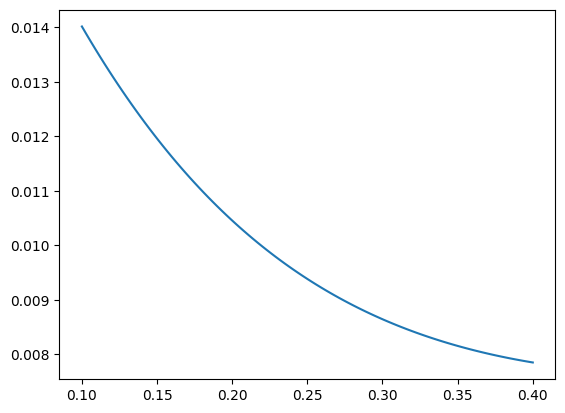

In [54]:
posterior.plot()

In [ ]:
'''
Because of the shape, we can see extreme values of x being more likely.
This indicates that values near 0.5 are less likely, since we know x is between 0.1 and 0.4, 
this means we are more likely operating closer to 0.1.
Therefore this new system is worse, most likely.
'''